# Assignment

Following is data describing characteristics of blog posts, with a target feature of how many comments will be posted in the following 24 hours.

https://archive.ics.uci.edu/ml/datasets/BlogFeedback

Investigate - you can try both linear and ridge. You can also sample to smaller data size and see if that makes ridge more important. Don't forget to scale!

Focus on the training data, but if you want to load and compare to any of the test data files you can also do that.

Note - Ridge may not be that fundamentally superior in this case. That's OK! It's still good to practice both, and see if you can find parameters or sample sizes where ridge does generalize and perform better.

When you've fit models to your satisfaction, answer the following question:

```
Did you find cases where Ridge performed better? If so, describe (alpha parameter, sample size, any other relevant info/processing). If not, what do you think that tells you about the data?
```

You can create whatever plots, tables, or other results support your argument. In this case, your target audience is a fellow data scientist, *not* a layperson, so feel free to dig in!

# Resources and stretch goals

Resources:
- https://www.quora.com/What-is-regularization-in-machine-learning
- https://blogs.sas.com/content/subconsciousmusings/2017/07/06/how-to-use-regularization-to-prevent-model-overfitting/
- https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/
- https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
- https://stats.stackexchange.com/questions/111017/question-about-standardizing-in-ridge-regression#111022

Stretch goals:
- Revisit past data you've fit OLS models to, and see if there's an `alpha` such that ridge regression results in a model with lower MSE on a train/test split
- Yes, Ridge can be applied to classification! Check out [sklearn.linear_model.RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier), and try it on a problem you previous approached with a different classifier (note - scikit LogisticRegression also automatically penalizes based on the $L^2$ norm, so the difference won't be as dramatic)
- Implement your own function to calculate the full cost that ridge regression is optimizing (the sum of squared residuals + `alpha` times the sum of squared coefficients) - this alone won't fit a model, but you can use it to verify cost of trained models and that the coefficients from the equivalent OLS (without regularization) may have a higher cost

In [144]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("blogData_train.csv",header=None)

In [41]:
# df.rename(index = str, columns = {"263": "Monday", 264: "Tuesday",265: "Wednesday", 266: "Thursday", 267: "Friday",\
#            268:"Saturday", 269: "Sunday"})
# df["Monday"]


In [42]:
weekday = df[[264,265,266,267,268,269,270]]
target = df[280]

In [159]:
df[200].describe()

count    52397.000000
mean         0.003779
std          0.061357
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 200, dtype: float64

## All

In [168]:
features = df.drop([280],axis=1)
target = df[280]

In [169]:
X_train, X_test, y_train, y_test = train_test_split(features, target )

In [170]:
ridge_reg = Ridge(alpha=200).fit(X_train, y_train)
mean_squared_error(y_test, ridge_reg.predict(X_test))

904.4715809132983

In [171]:
lin_reg = LinearRegression().fit(X_train, y_train)
mean_squared_error(y_test, lin_reg.predict(X_test))

907.7759538591752

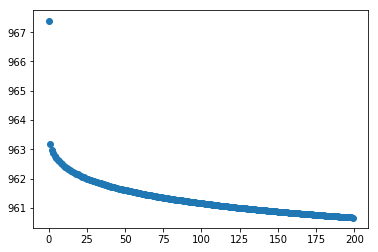

In [157]:
mse_list = []
alpha_list = []
for alpha in range(0, 200, 1):
    ridge_reg_split = Ridge(alpha=alpha).fit(X_train, y_train)
    mse = mean_squared_error(y_test, ridge_reg_split.predict(X_test))
    alpha_list.append(alpha)
    mse_list.append(mse)
plt.scatter(alpha_list, mse_list)

In [108]:
mse,alpha

(885, 199)

### Weekday

In [93]:
weekday = df[[264,265,266,267,268,269,270]]
target = df[280]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weekday, target )

In [95]:
ridge_reg = Ridge().fit(X_train, y_train)
mean_squared_error(y_test, ridge_reg.predict(X_test))

1360.0877574873198

In [96]:
lin_reg = LinearRegression().fit(X_train, y_train)
mean_squared_error(y_test, lin_reg.predict(X_test))

1360.0877470429723

In [97]:
mse = 2000
alpha = 0
for alpha in range(0, 200, 1):
    ridge_reg_split = Ridge(alpha=alpha).fit(X_train, y_train)
    mse1 = mean_squared_error(y_test, ridge_reg_split.predict(X_test))
    if mse1<mse:
        mse=mse1
        alpha = alpha
        
mse,alpha

(1360.0877470429718, 199)

## Weekday 2

In [161]:
weekday2 = df[[271,272,273,274,275,276,277]]
target = df[280]

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weekday2, target )

In [163]:
ridge_reg = Ridge().fit(X_train, y_train)
mean_squared_error(y_test, ridge_reg.predict(X_test))

1295.7228445015796

In [164]:
lin_reg = LinearRegression().fit(X_train, y_train)
mean_squared_error(y_test, lin_reg.predict(X_test))

1295.7228914470745

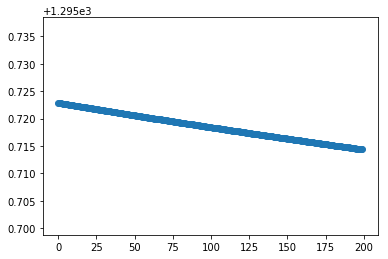

In [165]:
mse_list = []
alpha_list = []
for alpha in range(0, 200, 1):
    ridge_reg_split = Ridge(alpha=alpha).fit(X_train, y_train)
    mse = mean_squared_error(y_test, ridge_reg_split.predict(X_test))
    alpha_list.append(alpha)
    mse_list.append(mse)
plt.scatter(alpha_list, mse_list)

## Top 200

In [98]:
top200 = [i for i in range(64,263)]
top200 =df[top200]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(top200, target )
ridge_reg = Ridge().fit(X_train, y_train)
lin_reg = LinearRegression().fit(X_train, y_train)

In [100]:
mean_squared_error(y_test, ridge_reg.predict(X_test))

1271.3875172130984

In [101]:
mean_squared_error(y_test, lin_reg.predict(X_test))

1271.2870345587614

In [102]:
mse = 2000
alpha = 0
for alpha in range(0, 200, 1):
    ridge_reg_split = Ridge(alpha=alpha).fit(X_train, y_train)
    mse1 = mean_squared_error(y_test, ridge_reg_split.predict(X_test))
    if mse1<mse:
        mse=mse1
        alpha = alpha
        
mse,alpha

(1271.2495104962209, 199)

## Combo

In [142]:

combo = [i for i in range(64,270)]
combo = df[combo]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(combo, target )
ridge_reg = Ridge().fit(X_train, y_train)
lin_reg = LinearRegression().fit(X_train, y_train)

In [139]:
mean_squared_error(y_test, ridge_reg.predict(X_test))

1321.9844804576865

In [140]:
mean_squared_error(y_test, ridge_reg.predict(X_test))

1321.9844804576865

In [141]:
mean_squared_error(y_test, lin_reg.predict(X_test))

1322.5832790235984

## standard Scaler

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
dfs = StandardScaler().fit_transform(df)

In [180]:
dfs =pd.DataFrame(dfs)

In [181]:
features = dfs.drop([280],axis=1)
target = dfs[280]

In [187]:
X_train, X_test, y_train, y_test = train_test_split(features, target )
ridge_reg = Ridge(alpha=200).fit(X_train, y_train)
lin_reg = LinearRegression().fit(X_train, y_train)

In [188]:
mean_squared_error(y_test, ridge_reg.predict(X_test))

0.707076477566053

In [189]:

mean_squared_error(y_test, lin_reg.predict(X_test))

0.706800365422257

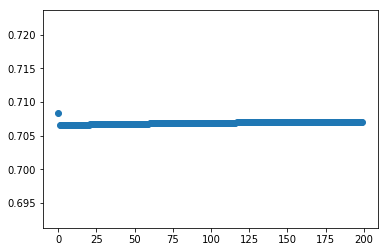

In [190]:
mse_list = []
alpha_list = []
for alpha in range(0, 200, 1):
    ridge_reg_split = Ridge(alpha=alpha).fit(X_train, y_train)
    mse = mean_squared_error(y_test, ridge_reg_split.predict(X_test))
    alpha_list.append(alpha)
    mse_list.append(mse)
plt.scatter(alpha_list, mse_list)

## Analysis 
Ridge regression has improved my analysis, but not by any order of magnitude.